In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
import random
random.seed(42)
import seaborn as sns


## Data Preprocessing

In [30]:
data = pd.read_csv('/Users/changlu/Downloads/Customer_Data 2.csv')

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [32]:
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


Data cleaning: I'll look for and remove the null value in the data

In [33]:
data.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [34]:
data1= data.dropna()

In [35]:
data1.isna().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

I dropped customer ID column because it does not help in building the model.

In [36]:
data1.drop('CUST_ID', axis=1,inplace=True)
data1.describe(include='all')

/var/folders/79/7yq6rdps2zq1c9tdqv3r65_h0000gn/T/ipykernel_38245/1355867756.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1.drop('CUST_ID', axis=1,inplace=True)


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000
mean,1601.224893,0.895035,1025.433874,604.901438,420.843533,994.175523,0.496000,0.205909,0.368820,0.137604,3.313918,15.033233,4522.091030,1784.478099,864.304943,0.159304,11.534391
std,2095.571300,0.207697,2167.107984,1684.307803,917.245182,2121.458303,0.401273,0.300054,0.398093,0.201791,6.912506,25.180468,3659.240379,2909.810090,2372.566350,0.296271,1.310984
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.049513,0.019163,0.000000,6.000000
25%,148.095189,0.909091,43.367500,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,418.559237,169.163545,0.000000,12.000000
50%,916.855459,1.000000,375.405000,44.995000,94.785000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,896.675701,312.452292,0.000000,12.000000
75%,2105.195853,1.000000,1145.980000,599.100000,484.147500,1132.385490,0.916667,0.333333,0.750000,0.250000,4.000000,18.000000,6500.000000,1951.142090,825.496463,0.166667,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


array([[<Axes: title={'center': 'BALANCE'}>,
        <Axes: title={'center': 'BALANCE_FREQUENCY'}>,
        <Axes: title={'center': 'PURCHASES'}>,
        <Axes: title={'center': 'ONEOFF_PURCHASES'}>],
       [<Axes: title={'center': 'INSTALLMENTS_PURCHASES'}>,
        <Axes: title={'center': 'CASH_ADVANCE'}>,
        <Axes: title={'center': 'PURCHASES_FREQUENCY'}>,
        <Axes: title={'center': 'ONEOFF_PURCHASES_FREQUENCY'}>],
       [<Axes: title={'center': 'PURCHASES_INSTALLMENTS_FREQUENCY'}>,
        <Axes: title={'center': 'CASH_ADVANCE_FREQUENCY'}>,
        <Axes: title={'center': 'CASH_ADVANCE_TRX'}>,
        <Axes: title={'center': 'PURCHASES_TRX'}>],
       [<Axes: title={'center': 'CREDIT_LIMIT'}>,
        <Axes: title={'center': 'PAYMENTS'}>,
        <Axes: title={'center': 'MINIMUM_PAYMENTS'}>,
        <Axes: title={'center': 'PRC_FULL_PAYMENT'}>],
       [<Axes: title={'center': 'TENURE'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

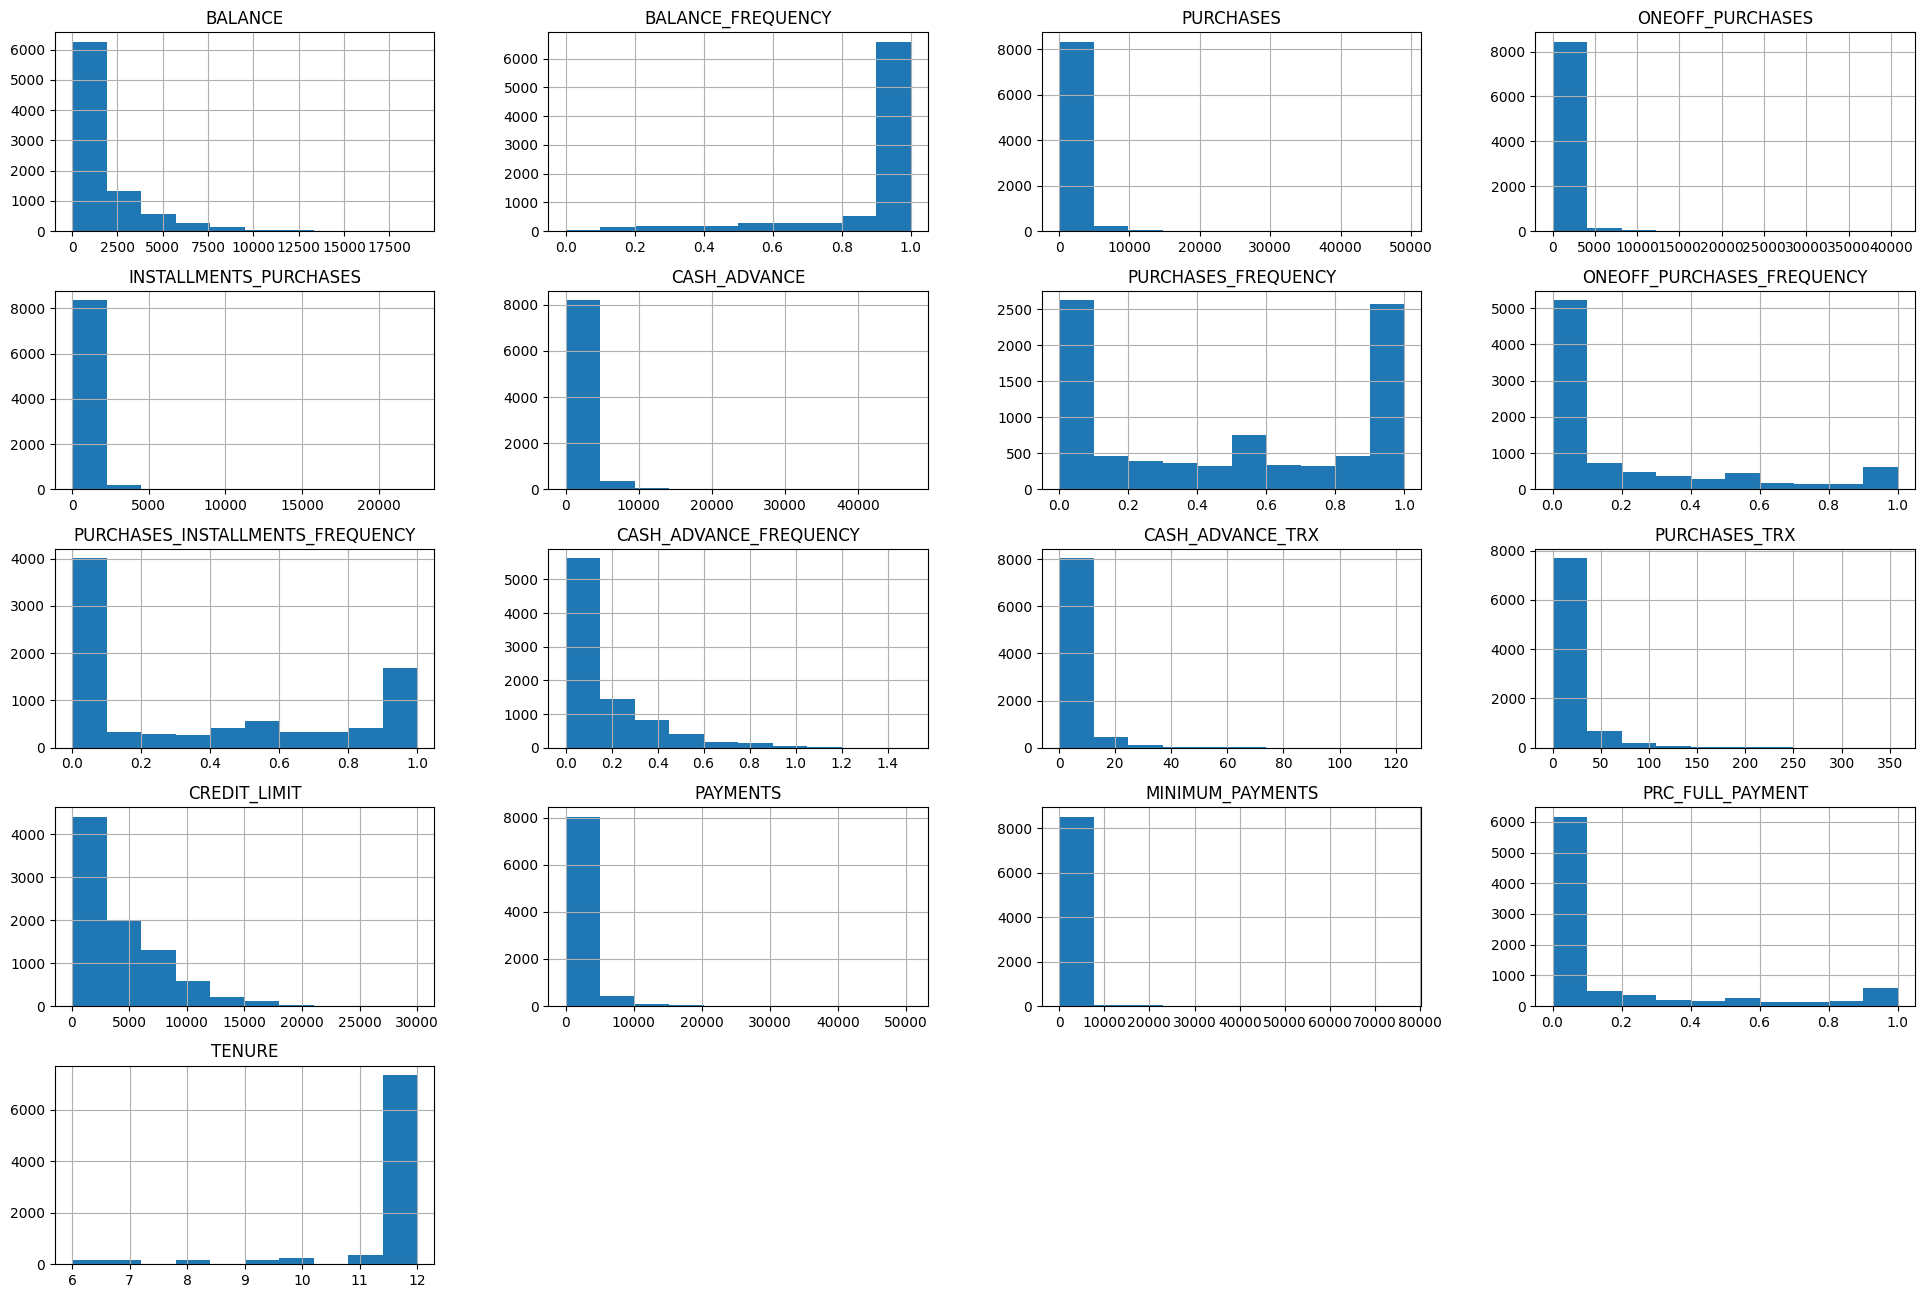

In [37]:
data1.hist(figsize=(24,16))

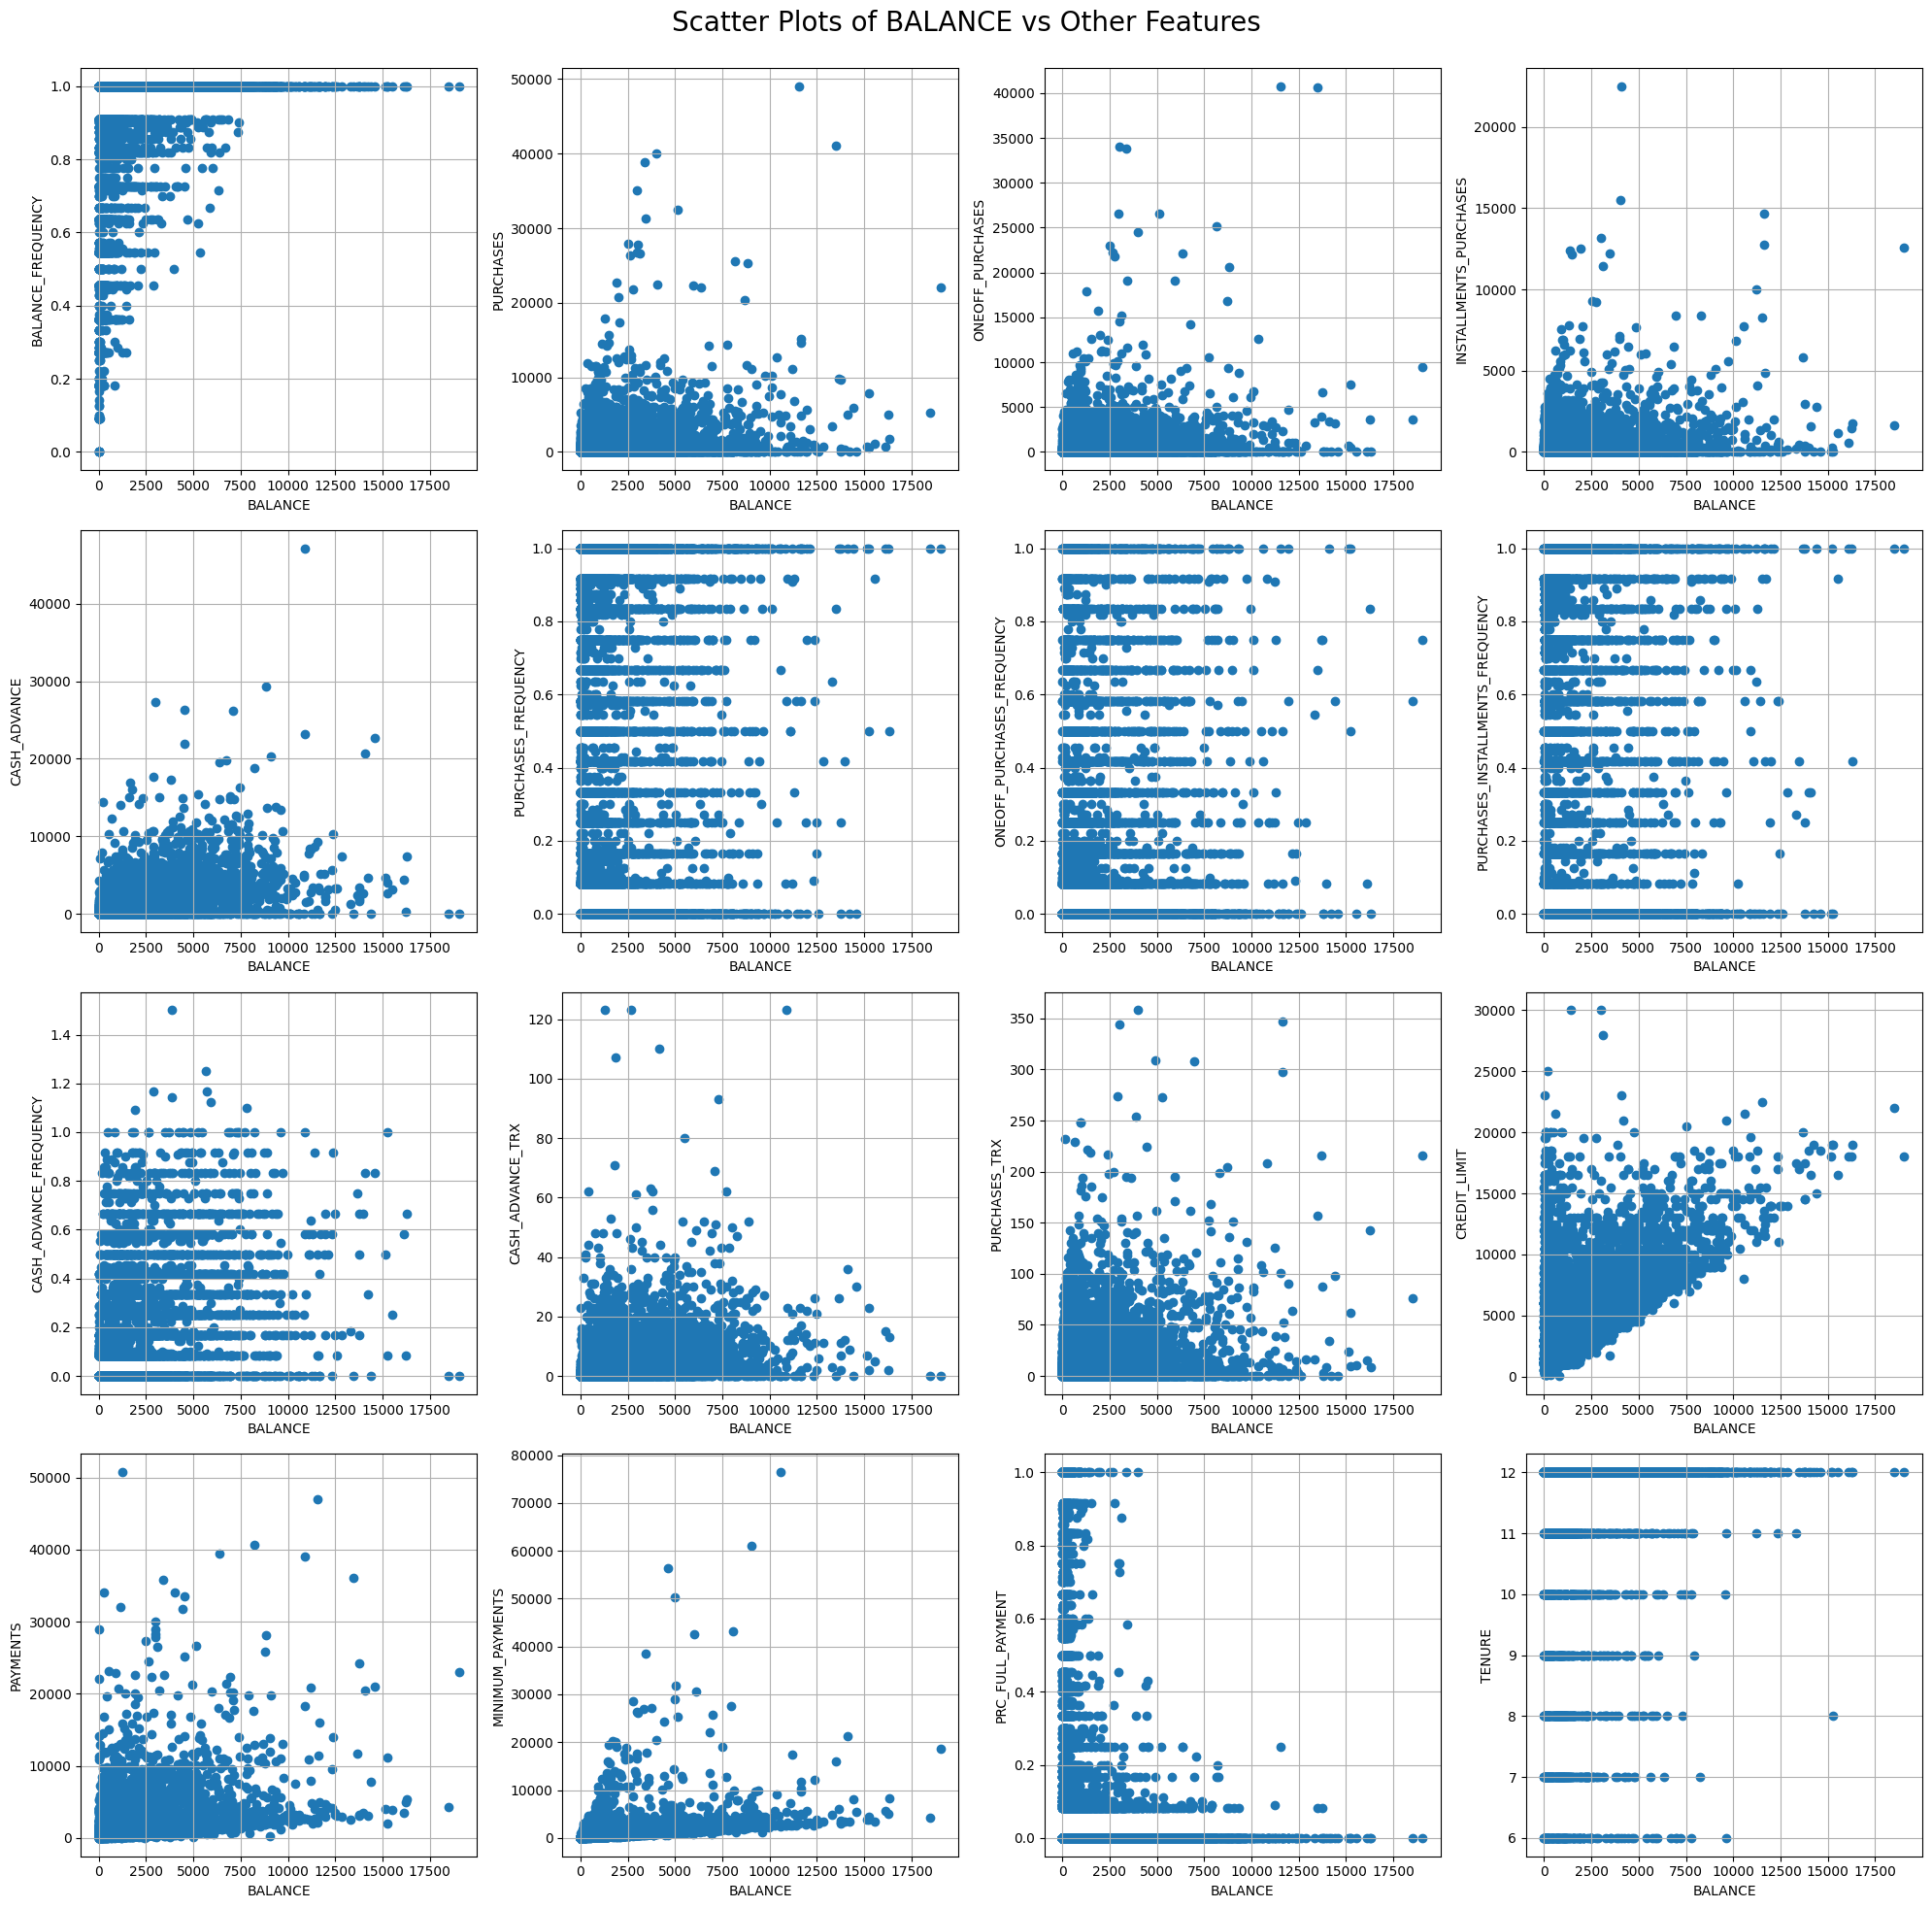

In [38]:
# Correctly calculate the number of rows and columns needed for the subplot grid
num_plots = len(data1.columns) - 1  # Subtract 1 for the 'BALANCE' column itself
num_cols = 4
num_rows = int(num_plots / num_cols) + (1 if num_plots % num_cols else 0)  # Add an extra row if there are any remainders

# Set up the plotting environment
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, num_rows * 5))
fig.suptitle("Scatter Plots of BALANCE vs Other Features", fontsize=20)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each scatter plot, including the 'TENURE' column
plot_index = 0
for col in data1.columns:
    if col != 'BALANCE':
        axes[plot_index].scatter(data1['BALANCE'], data1[col])
        axes[plot_index].set_xlabel('BALANCE')
        axes[plot_index].set_ylabel(col)
        axes[plot_index].grid(True)
        plot_index += 1

# Hide any unused subplots
for j in range(plot_index, len(axes)):
    axes[j].set_visible(False)

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()


In [39]:
correlation = data1.corr()
correlation

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
BALANCE,1.000000,0.310140,0.176083,0.159985,0.122109,0.495586,-0.088459,0.063832,-0.069582,0.445307,0.382388,0.147887,0.535518,0.322830,0.398669,-0.333594,0.066987
BALANCE_FREQUENCY,0.310140,1.000000,0.122635,0.095254,0.114739,0.089036,0.228158,0.187467,0.184159,0.181132,0.133265,0.183095,0.087682,0.039169,0.132519,-0.156961,0.104714
PURCHASES,0.176083,0.122635,1.000000,0.916780,0.679259,-0.053760,0.393000,0.497384,0.316025,-0.124863,-0.070277,0.688732,0.358425,0.606782,0.093842,0.176447,0.084545
ONEOFF_PURCHASES,0.159985,0.095254,0.916780,1.000000,0.329650,-0.033244,0.265460,0.524514,0.128380,-0.086413,-0.048705,0.545313,0.320613,0.570850,0.048741,0.129890,0.063400
INSTALLMENTS_PURCHASES,0.122109,0.114739,0.679259,0.329650,1.000000,-0.066099,0.441193,0.211829,0.511130,-0.136455,-0.076716,0.626083,0.258057,0.385391,0.132156,0.178440,0.083346
CASH_ADVANCE,0.495586,0.089036,-0.053760,-0.033244,-0.066099,1.000000,-0.218566,-0.090111,-0.178873,0.629030,0.656911,-0.078449,0.304161,0.459342,0.140094,-0.158566,-0.073090
PURCHASES_FREQUENCY,-0.088459,0.228158,0.393000,0.265460,0.441193,-0.218566,1.000000,0.502123,0.862338,-0.316771,-0.208749,0.567168,0.121372,0.100715,0.002979,0.305393,0.052161
ONEOFF_PURCHASES_FREQUENCY,0.063832,0.187467,0.497384,0.524514,0.211829,-0.090111,0.502123,1.000000,0.143911,-0.118225,-0.073384,0.544364,0.295432,0.244346,-0.030357,0.154073,0.080437
PURCHASES_INSTALLMENTS_FREQUENCY,-0.069582,0.184159,0.316025,0.128380,0.511130,-0.178873,0.862338,0.143911,1.000000,-0.268924,-0.172811,0.529192,0.063421,0.083424,0.030036,0.249547,0.065779
CASH_ADVANCE_FREQUENCY,0.445307,0.181132,-0.124863,-0.086413,-0.136455,0.629030,-0.316771,-0.118225,-0.268924,1.000000,0.799593,-0.136913,0.132841,0.182340,0.098844,-0.260001,-0.140038


<Axes: >

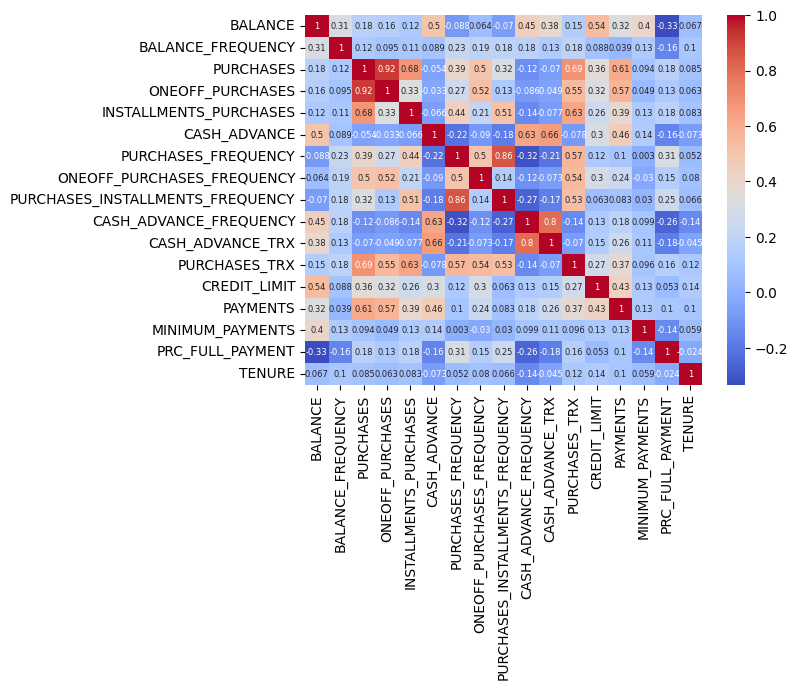

In [40]:
sns.heatmap(correlation,annot_kws = {"size":6},cmap='coolwarm', annot=True)

Based on the correlation table and heatmap, some of the features are having very high correlations between each other, which may affect the overall model. Therefore I would like to drop some of the features here.

I choose to use 0.7 as the value to drop some of the features. Correlations greater than 0.7: "ONEOFF_PURCHASES" and "PURCHASES", "PURCHASES_INSTALLMENTS_FREQUENCY" and "PURCHASES_FREQUENCY", "CASH_ADVANCE_TRX" and "CASH_ADVANCE_FREQUENCY"

Then we will only keep columns with lower correlation. 

In [41]:
df_drop = data1.drop(columns=['BALANCE','PURCHASES','CASH_ADVANCE','PURCHASES_FREQUENCY','PURCHASES_INSTALLMENTS_FREQUENCY','CASH_ADVANCE_FREQUENCY','PURCHASES_TRX'])
df_drop.head()

,BALANCE_FREQUENCY,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,ONEOFF_PURCHASES_FREQUENCY,CASH_ADVANCE_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0.818182,0.00,95.40,0.000000,0,1000.0,201.802084,139.509787,0.000000,12
1,0.909091,0.00,0.00,0.000000,4,7000.0,4103.032597,1072.340217,0.222222,12
2,1.000000,773.17,0.00,1.000000,0,7500.0,622.066742,627.284787,0.000000,12
4,1.000000,16.00,0.00,0.083333,0,1200.0,678.334763,244.791237,0.000000,12
5,1.000000,0.00,1333.28,0.000000,0,1800.0,1400.057770,2407.246035,0.000000,12


Scaling

In [42]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

data_scaled = scaler.fit_transform(data1)
data_scaled_df = pd.DataFrame(data_scaled, columns=data1.columns)
data_scaled_df.head()


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.744625,-0.370047,-0.429184,-0.359160,-0.354826,-0.468655,-0.820769,-0.686280,-0.717179,-0.681953,-0.479437,-0.517623,-0.962575,-0.543942,-0.305508,-0.537727,0.355181
1,0.764152,0.067679,-0.473208,-0.359160,-0.458839,2.568556,-1.236139,-0.686280,-0.926522,0.557022,0.099258,-0.597054,0.677204,0.796852,0.087689,0.212380,0.355181
2,0.426602,0.505405,-0.116413,0.099909,-0.458839,-0.468655,1.256077,2.646651,-0.926522,-0.681953,-0.479437,-0.120467,0.813852,-0.399503,-0.099906,-0.537727,0.355181
3,-0.373910,0.505405,-0.465825,-0.349660,-0.458839,-0.468655,-1.028455,-0.408536,-0.926522,-0.681953,-0.479437,-0.557339,-0.907916,-0.380165,-0.261131,-0.537727,0.355181
4,0.099551,0.505405,0.142062,-0.359160,0.994815,-0.468655,0.425339,-0.686280,0.538882,-0.681953,-0.479437,-0.279329,-0.743938,-0.132119,0.650363,-0.537727,0.355181


PCA

## EDA

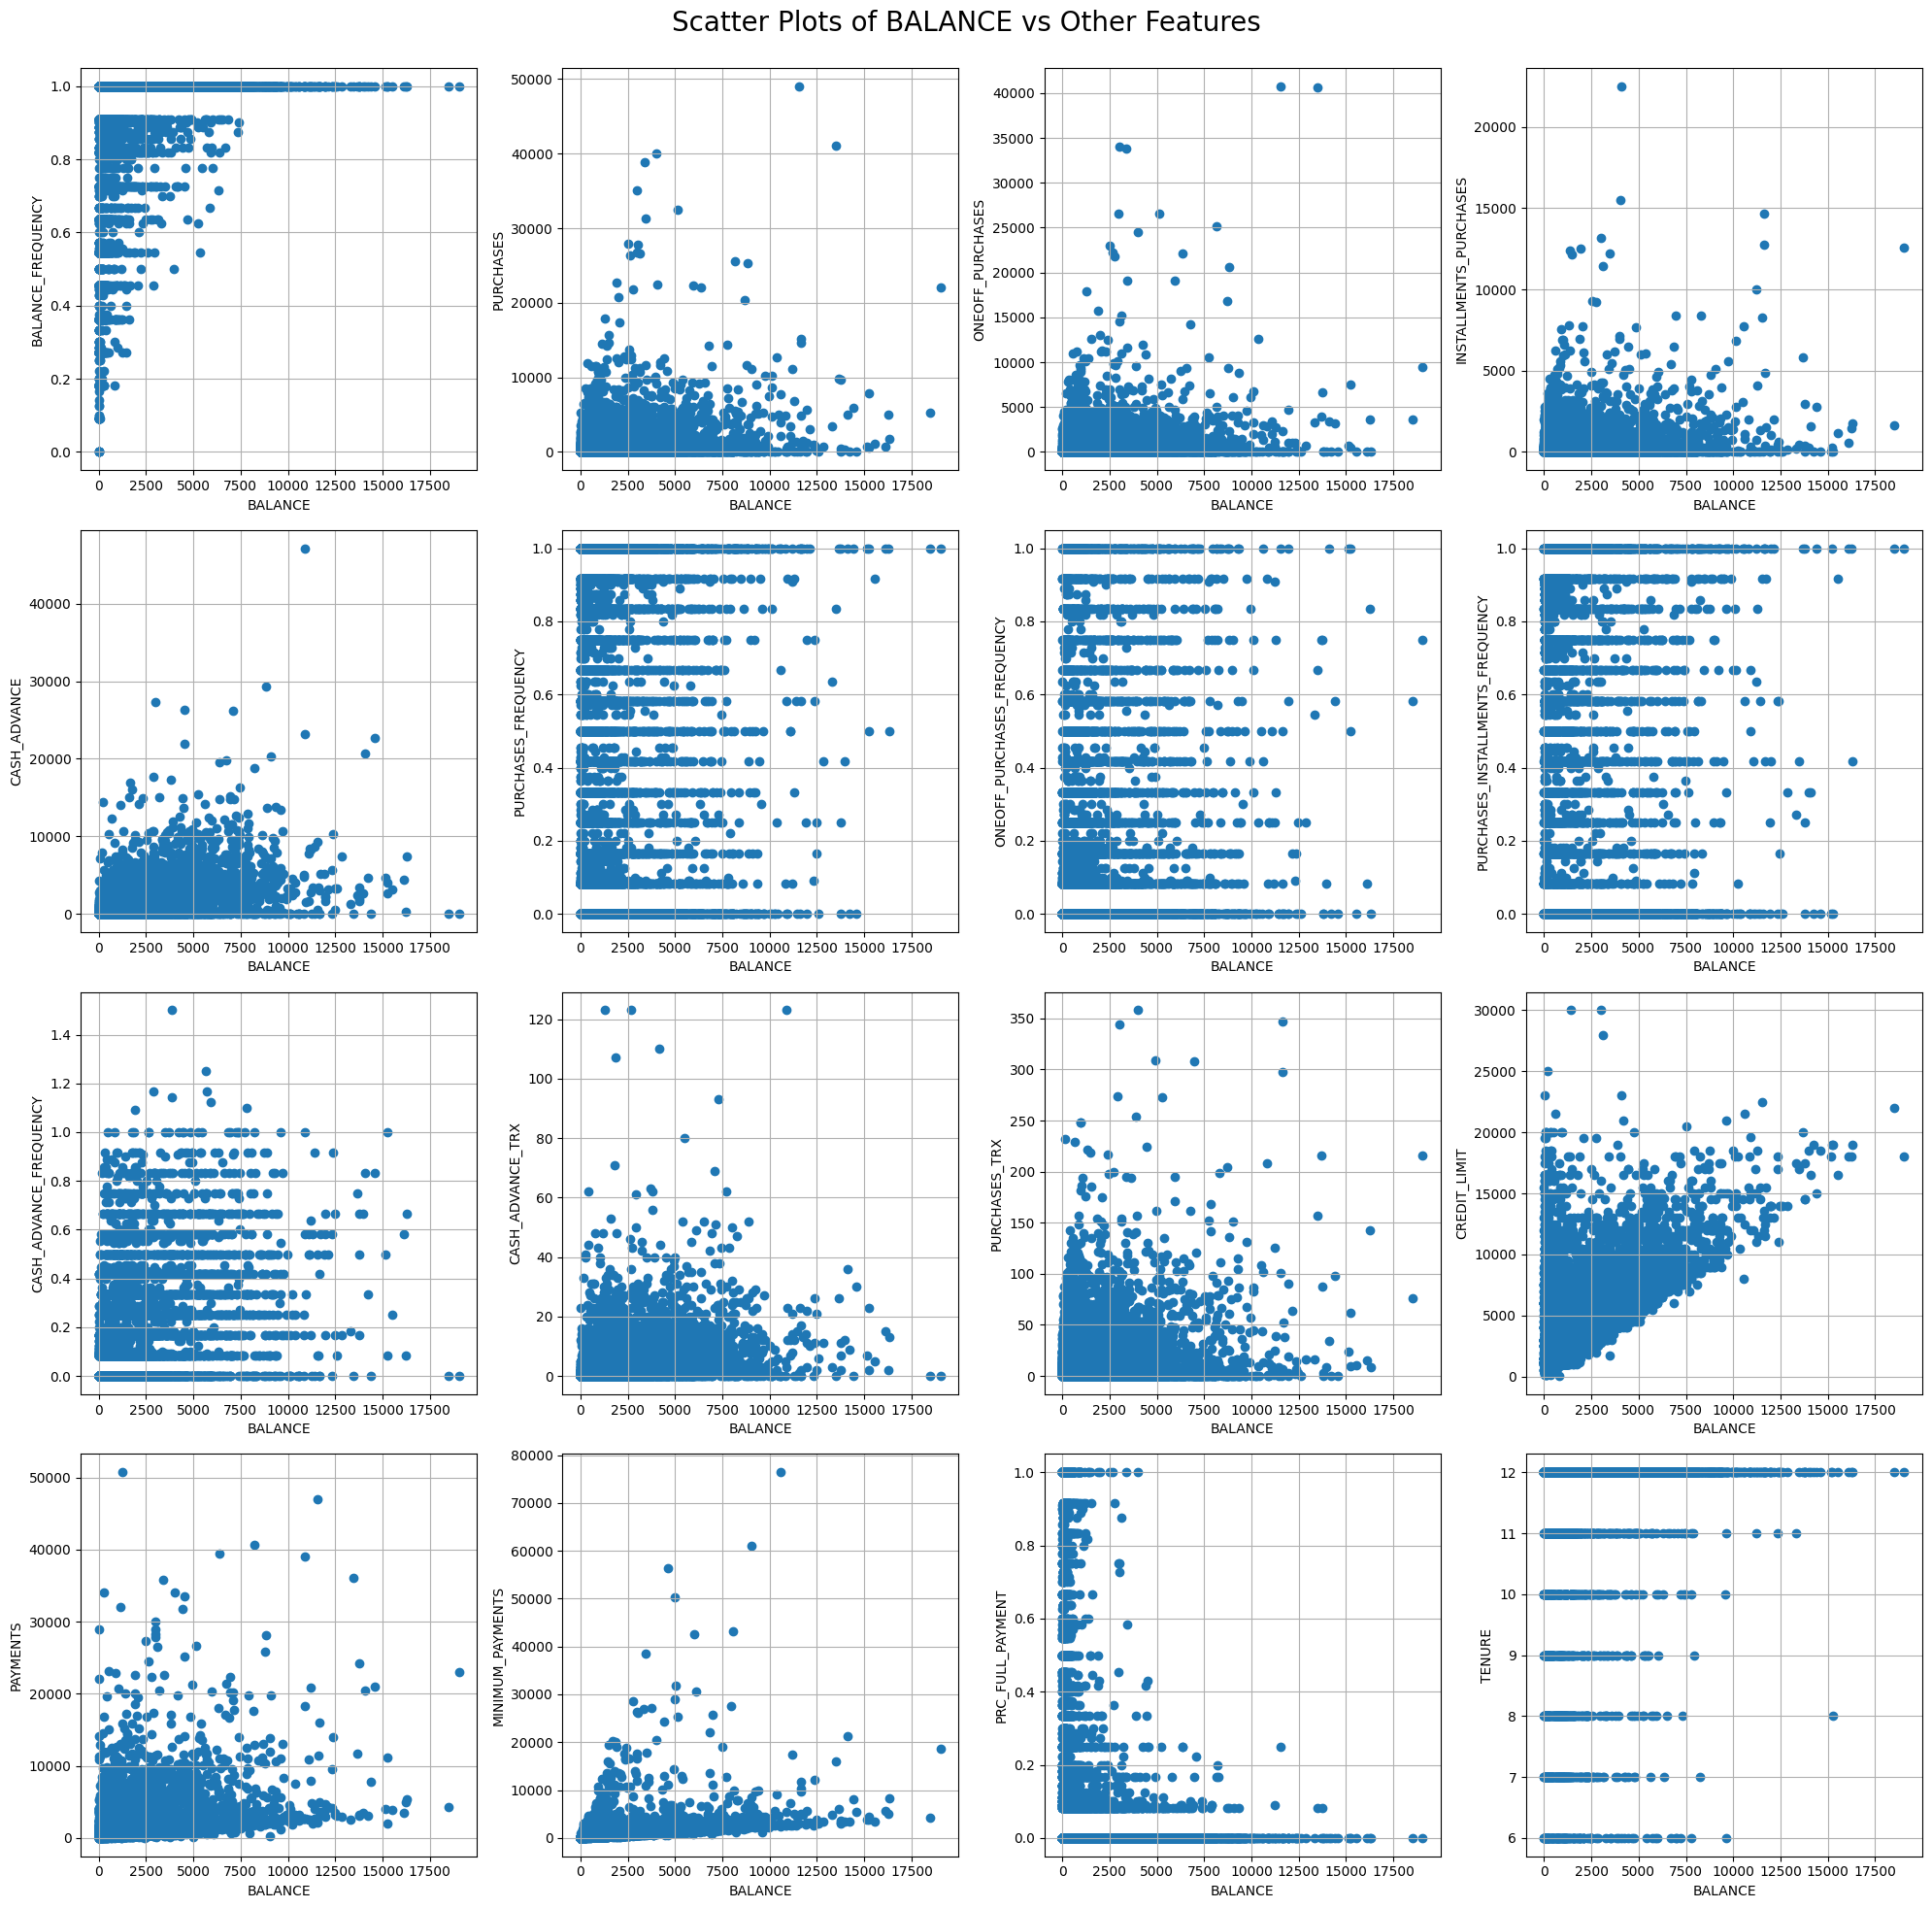

In [43]:
# Correctly calculate the number of rows and columns needed for the subplot grid
num_plots = len(data1.columns) - 1  # Subtract 1 for the 'BALANCE' column itself
num_cols = 4
num_rows = int(num_plots / num_cols) + (1 if num_plots % num_cols else 0)  # Add an extra row if there are any remainders

# Set up the plotting environment
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, num_rows * 5))
fig.suptitle("Scatter Plots of BALANCE vs Other Features", fontsize=20)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each scatter plot, including the 'TENURE' column
plot_index = 0
for col in data1.columns:
    if col != 'BALANCE':
        axes[plot_index].scatter(data1['BALANCE'], data1[col])
        axes[plot_index].set_xlabel('BALANCE')
        axes[plot_index].set_ylabel(col)
        axes[plot_index].grid(True)
        plot_index += 1

# Hide any unused subplots
for j in range(plot_index, len(axes)):
    axes[j].set_visible(False)

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()

array([[<Axes: title={'center': 'BALANCE'}>,
        <Axes: title={'center': 'BALANCE_FREQUENCY'}>,
        <Axes: title={'center': 'PURCHASES'}>,
        <Axes: title={'center': 'ONEOFF_PURCHASES'}>],
       [<Axes: title={'center': 'INSTALLMENTS_PURCHASES'}>,
        <Axes: title={'center': 'CASH_ADVANCE'}>,
        <Axes: title={'center': 'PURCHASES_FREQUENCY'}>,
        <Axes: title={'center': 'ONEOFF_PURCHASES_FREQUENCY'}>],
       [<Axes: title={'center': 'PURCHASES_INSTALLMENTS_FREQUENCY'}>,
        <Axes: title={'center': 'CASH_ADVANCE_FREQUENCY'}>,
        <Axes: title={'center': 'CASH_ADVANCE_TRX'}>,
        <Axes: title={'center': 'PURCHASES_TRX'}>],
       [<Axes: title={'center': 'CREDIT_LIMIT'}>,
        <Axes: title={'center': 'PAYMENTS'}>,
        <Axes: title={'center': 'MINIMUM_PAYMENTS'}>,
        <Axes: title={'center': 'PRC_FULL_PAYMENT'}>],
       [<Axes: title={'center': 'TENURE'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

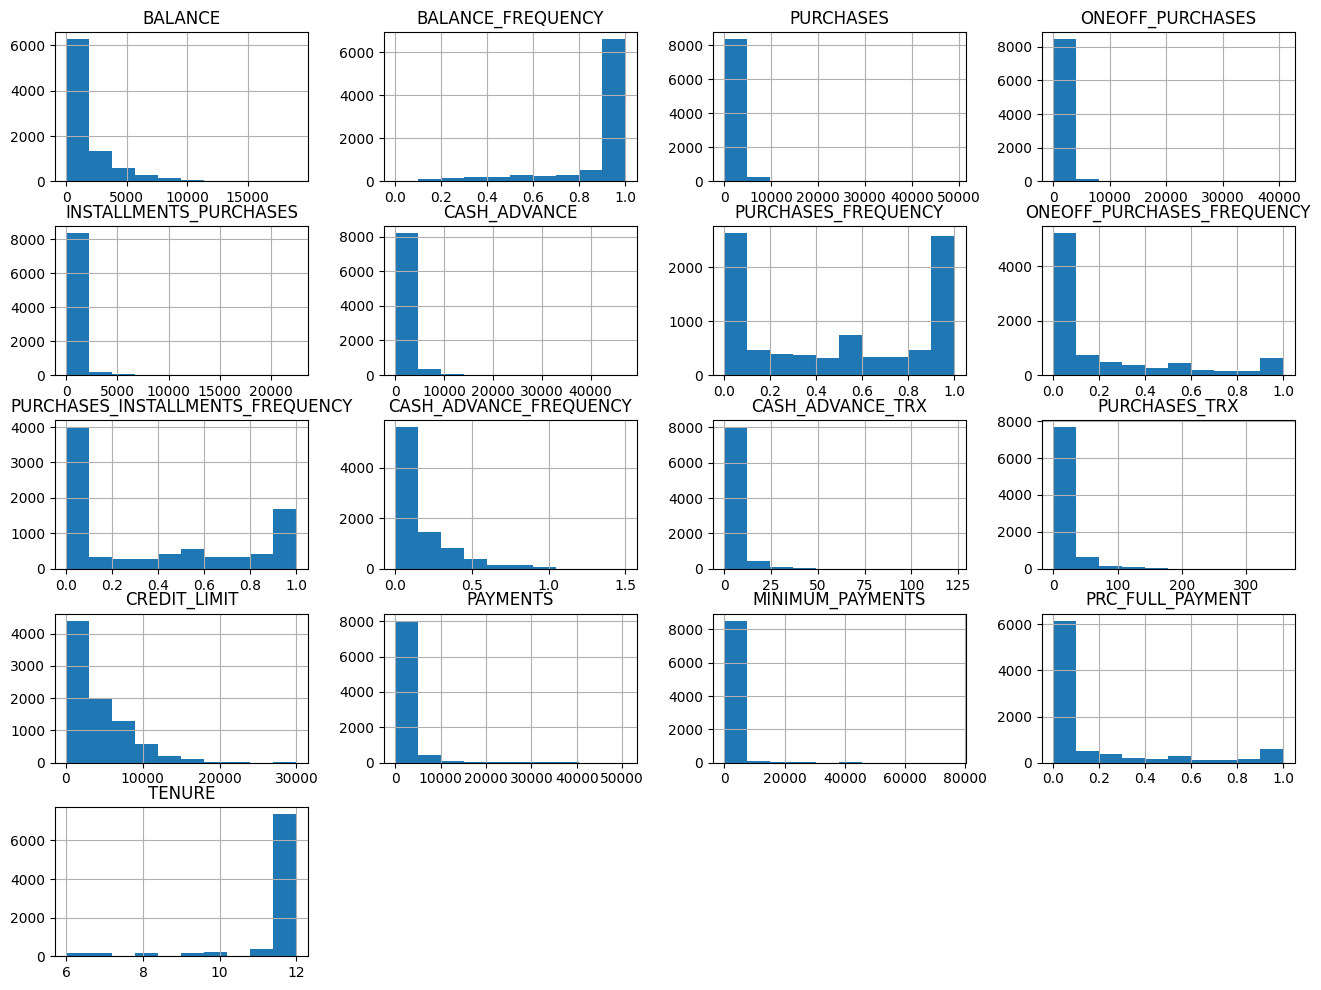

In [44]:
data1.hist(figsize=(16,12))

based on the histogram, we can identify that most of the features are right-skewed.

In [45]:
data_scaled_df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.744625,-0.370047,-0.429184,-0.359160,-0.354826,-0.468655,-0.820769,-0.686280,-0.717179,-0.681953,-0.479437,-0.517623,-0.962575,-0.543942,-0.305508,-0.537727,0.355181
1,0.764152,0.067679,-0.473208,-0.359160,-0.458839,2.568556,-1.236139,-0.686280,-0.926522,0.557022,0.099258,-0.597054,0.677204,0.796852,0.087689,0.212380,0.355181
2,0.426602,0.505405,-0.116413,0.099909,-0.458839,-0.468655,1.256077,2.646651,-0.926522,-0.681953,-0.479437,-0.120467,0.813852,-0.399503,-0.099906,-0.537727,0.355181
3,-0.373910,0.505405,-0.465825,-0.349660,-0.458839,-0.468655,-1.028455,-0.408536,-0.926522,-0.681953,-0.479437,-0.557339,-0.907916,-0.380165,-0.261131,-0.537727,0.355181
4,0.099551,0.505405,0.142062,-0.359160,0.994815,-0.468655,0.425339,-0.686280,0.538882,-0.681953,-0.479437,-0.279329,-0.743938,-0.132119,0.650363,-0.537727,0.355181
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8631,-0.761342,-1.902089,-0.463563,-0.346751,-0.458839,-0.468655,-0.820769,-0.130790,-0.926522,-0.681953,-0.479437,-0.557339,-1.099224,-0.593143,-0.345988,-0.537727,-4.221800
8632,-0.750546,0.505405,-0.338865,-0.359160,-0.141436,-0.468655,1.256077,-0.686280,1.166912,-0.681953,-0.479437,-0.358760,-0.962575,-0.501396,-0.343706,1.150015,-4.221800
8633,-0.752977,-0.297095,-0.406572,-0.359160,-0.301402,-0.468655,0.840707,-0.686280,0.748227,-0.681953,-0.479437,-0.398476,-0.962575,-0.585367,-0.329572,0.306144,-4.221800
8634,-0.757721,-0.297095,-0.473208,-0.359160,-0.458839,-0.451422,-1.236139,-0.686280,-0.926522,0.144032,-0.190089,-0.597054,-1.099224,-0.595238,-0.340811,0.306144,-4.221800


In [46]:
columns_to_check = data_scaled_df.columns[:10]


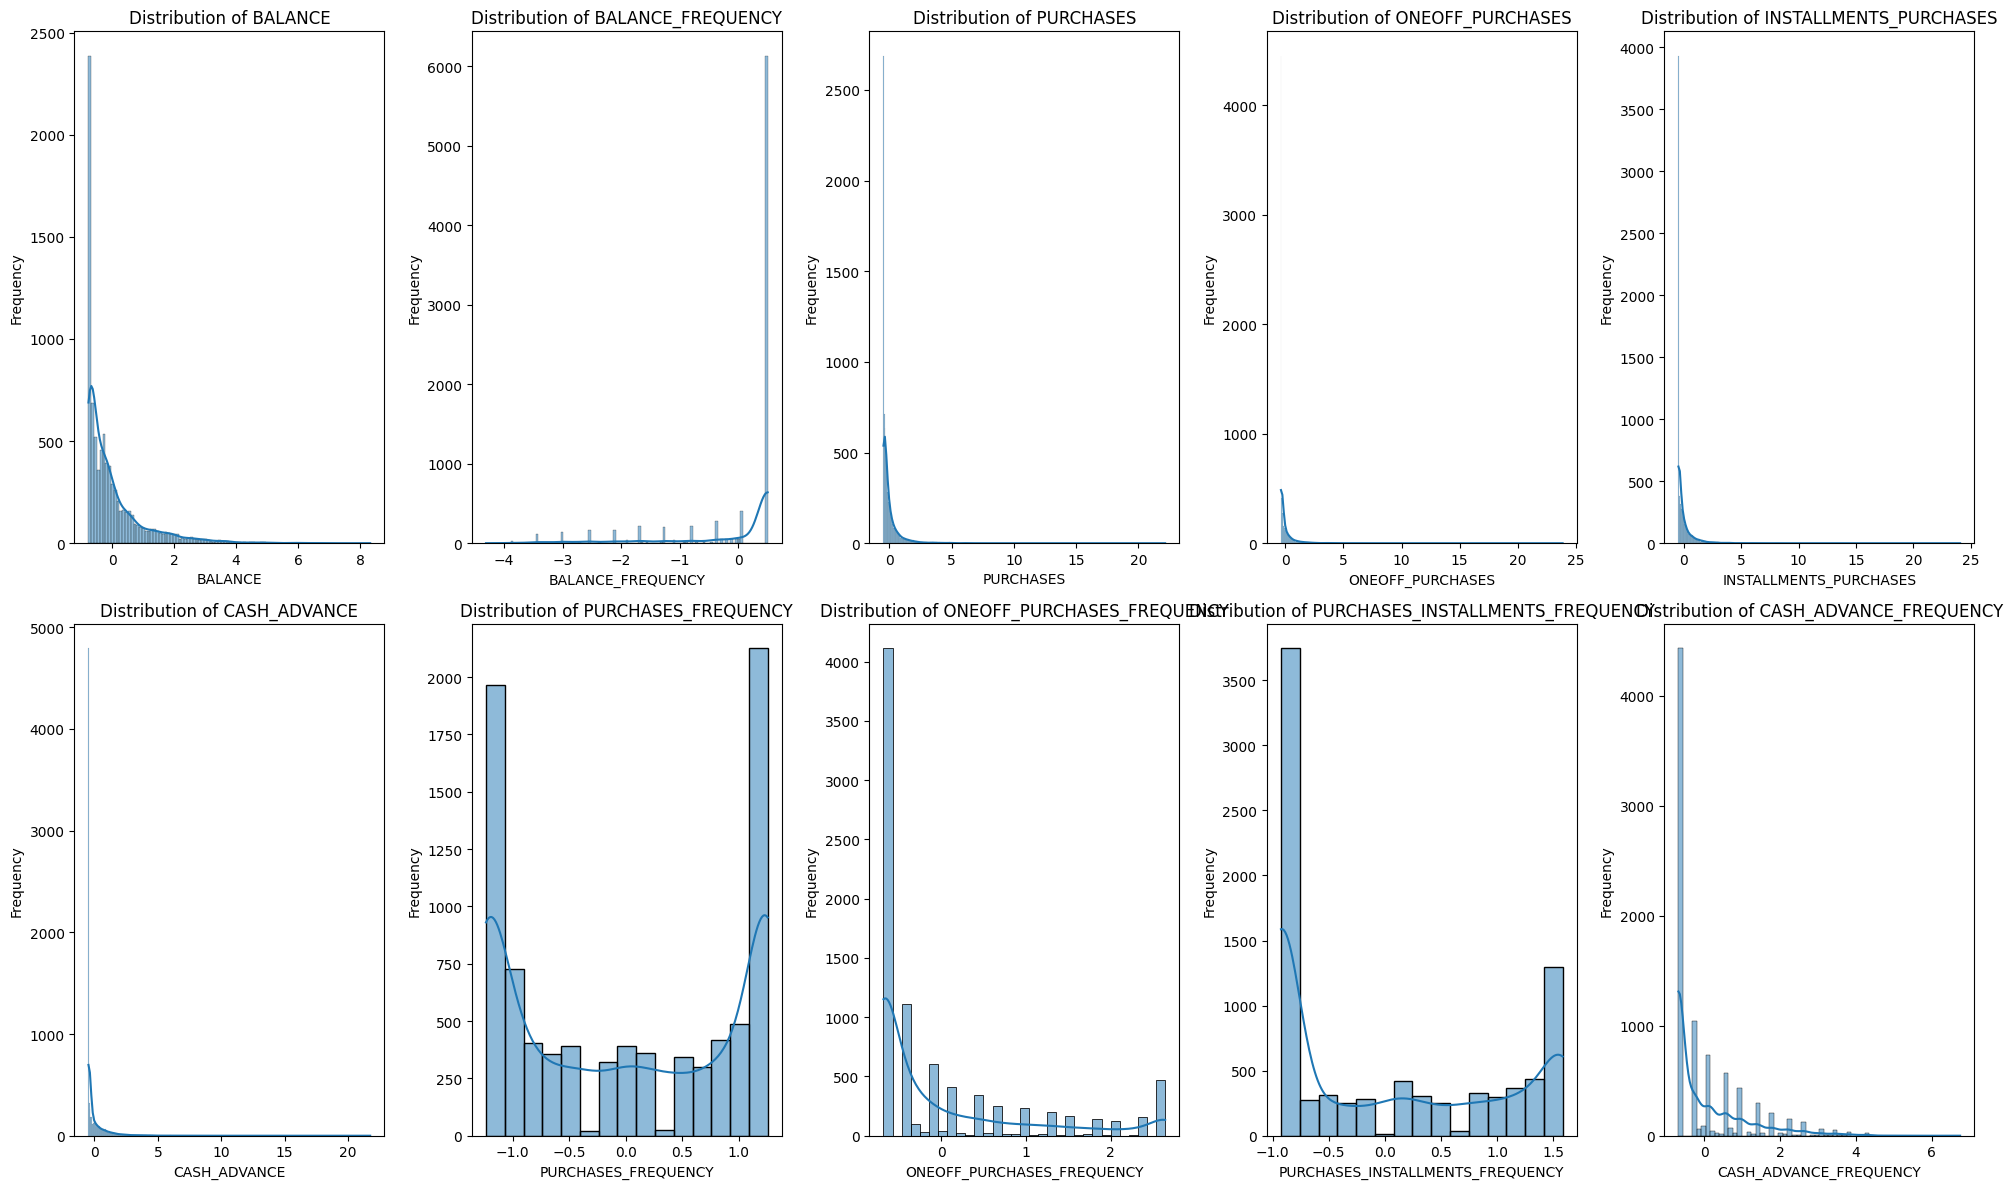

In [47]:
plt.figure(figsize=(20,12))
for i, column in enumerate(columns_to_check, 1):
    plt.subplot(2, 5, i)
    sns.histplot(data_scaled_df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Most of the features are having a right-skewed trend, which means most of the customers tend to make few purchases and are not spending much money on the platform.

For example, balance, purchases, payments are many other feature are very RIGHT-SKEWED, marking the trend of spending very few and limited number of purchases of most customers and transactions. However, some features, such as purchase_frequency, are not right-skewed. 

Purchase frequency is a little bit symmetric, which means there are around equal amount of customers tend to make very few purchase and make many purchases. The credit limit is not VERY right-skewed, which means most customers have a low-to-medium amount of credit available. 

Overall, most customers tend to have few and small transactions (purchases) activities. 

Most of the customers have a tenure of 12 and a lot of customers has a high purchase frequency, which means that there are still plenty of customers that are ACTIVE and have a trend to purchase regularly.

## K-means

In [48]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, AffinityPropagation
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split

/Users/changlu/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/changlu/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


/Users/changlu/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/changlu/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/changlu/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/changlu/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warning

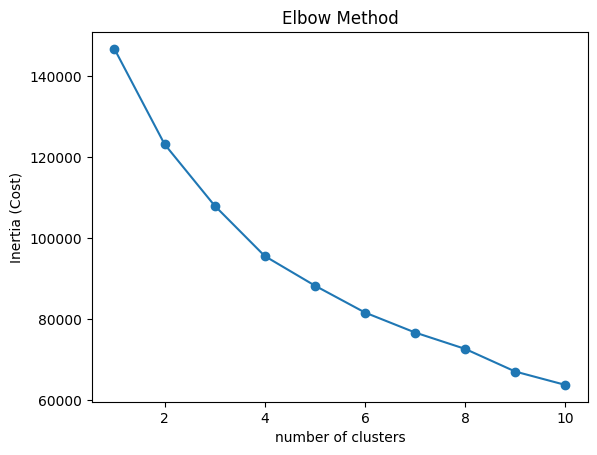

In [49]:
X=data_scaled_df

inertia = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.figure()
plt.plot(k_values, inertia,marker='o')
plt.xlabel('number of clusters')
plt.ylabel('Inertia (Cost)')
plt.title('Elbow Method')
plt.show()



/Users/changlu/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/changlu/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/changlu/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/changlu/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warning

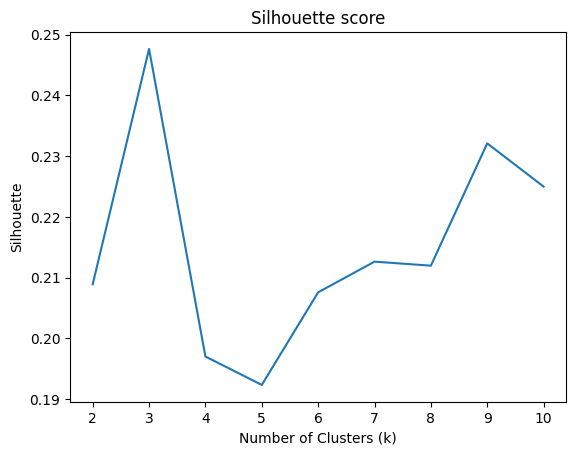

In [50]:
sil_score = []
k_values = range(2, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    labels = kmeans.labels_
    centers = kmeans.cluster_centers_
    sil_score.append(silhouette_score(X,labels))

plt.figure()
plt.plot(k_values, sil_score)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette')
plt.title('Silhouette score')
plt.show()

**Based on the elbow method graph and silhouette score, we can conclude that 3 is the optimal number of cluster**

In [51]:
K = 3
kmeans = KMeans(n_clusters=K, random_state= 0).fit(X)

/Users/changlu/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [52]:
data_scaled_df['cluster'] = kmeans.labels_
grouped_data = data_scaled_df.groupby('cluster').mean()
grouped_data


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
cluster,,,,,,,,,,,,,,,,,
0,-0.369681,-0.170328,-0.233566,-0.204603,-0.176097,-0.311742,-0.059786,-0.233709,-0.048289,-0.335909,-0.301130,-0.245168,-0.342998,-0.287539,-0.139650,0.015565,-0.025129
1,0.303323,0.419872,1.511683,1.263717,1.251221,-0.249094,1.133379,1.539164,0.957351,-0.364497,-0.254601,1.667687,0.888947,0.824408,0.157942,0.472298,0.295338
2,1.152442,0.313808,-0.295296,-0.211762,-0.309074,1.363250,-0.654289,-0.316062,-0.560971,1.543432,1.327688,-0.372694,0.598260,0.440132,0.401730,-0.424590,-0.134652


In [53]:
K = 3
kmeans = KMeans(n_clusters=K, random_state=0).fit(X)
labels = kmeans.labels_
centers = kmeans.cluster_centers_
print(centers)

/Users/changlu/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[[ 3.03323038e-01  4.19871592e-01  1.51168289e+00  1.26371701e+00
   1.25122055e+00 -2.49094185e-01  1.13337888e+00  1.53916362e+00
   9.57351426e-01 -3.64496906e-01 -2.54601272e-01  1.66768723e+00
   8.88946854e-01  8.24407765e-01  1.57942442e-01  4.72298073e-01
   2.95338488e-01  1.00000000e+00]
 [-3.69680700e-01 -1.70327919e-01 -2.33565765e-01 -2.04603205e-01
  -1.76096591e-01 -3.11741977e-01 -5.97856197e-02 -2.33709286e-01
  -4.82885792e-02 -3.35908969e-01 -3.01130172e-01 -2.45168218e-01
  -3.42997989e-01 -2.87539403e-01 -1.39650326e-01  1.55648091e-02
  -2.51285049e-02  3.33066907e-16]
 [ 1.15244158e+00  3.13807998e-01 -2.95295714e-01 -2.11762297e-01
  -3.09074118e-01  1.36324985e+00 -6.54288559e-01 -3.16062486e-01
  -5.60970958e-01  1.54343152e+00  1.32768780e+00 -3.72693965e-01
   5.98260286e-01  4.40131700e-01  4.01729554e-01 -4.24589912e-01
  -1.34652039e-01  2.00000000e+00]]


In [54]:
centers1=pd.DataFrame(centers, columns=X.columns)

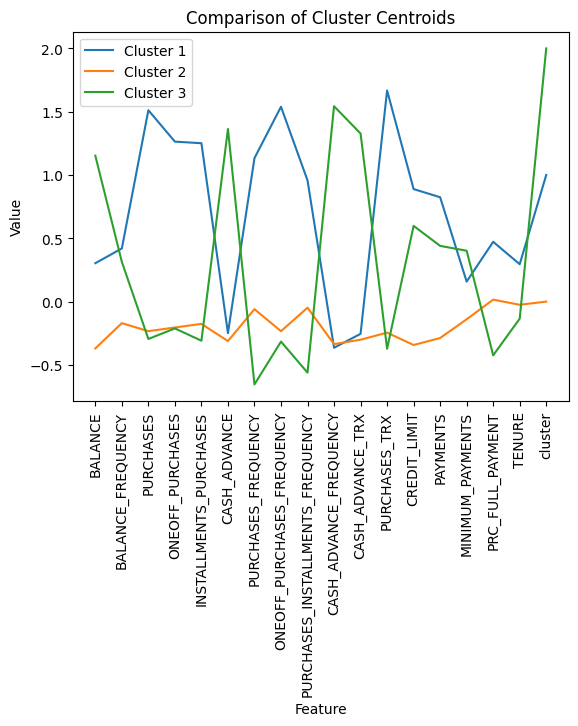

In [55]:
for i in range(K):
    plt.plot(centers1.columns, centers1.iloc[i], label=f'Cluster {i + 1}')

plt.title('Comparison of Cluster Centroids')
plt.ylabel('Value')
plt.xlabel('Feature')
plt.xticks(rotation=90)
plt.legend()
plt.show()

<Figure size 2000x2000 with 0 Axes>

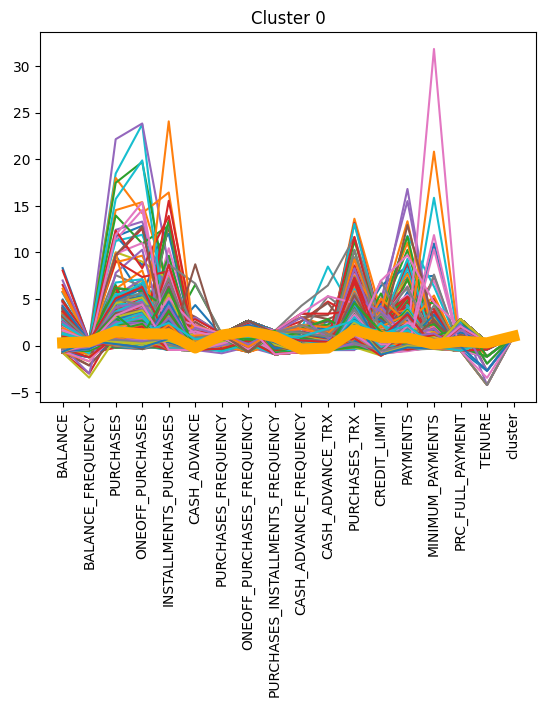

<Figure size 2000x2000 with 0 Axes>

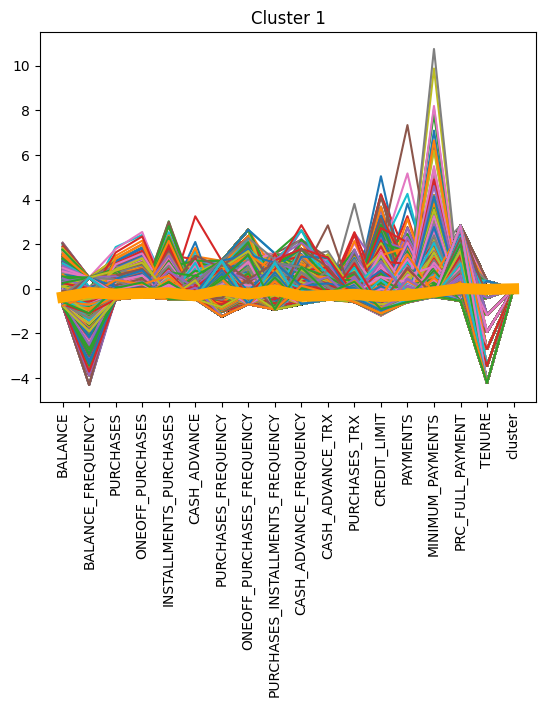

<Figure size 2000x2000 with 0 Axes>

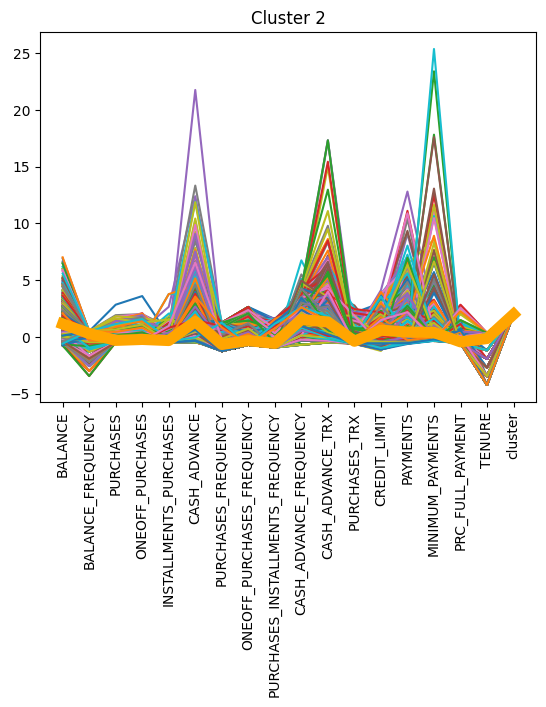

In [56]:
for c in range(K):
    plt.figure(figsize=(20, 20))
    X[kmeans.labels_ == c].T.plot(legend=False)
    plt.plot(kmeans.cluster_centers_[c], linewidth=8, color='orange')
    plt.title("Cluster " + str(c))
    plt.xticks(ticks=range(len(X.columns)), labels=X.columns, rotation=90)
    plt.show()

In [58]:
X_np= X.to_numpy()


In [68]:

Kmeans = KMeans(n_clusters=3)##
Kmeans.fit(X)
labels = Kmeans.labels_
centers =Kmeans.cluster_centers_

km_sil_score = silhouette_score(X, labels)
print(f"KMean_sil_score:{km_sil_score}")

##plt.scatter(X[:,0],X[:,1],c = labels)
##plt.title('K-mean Clustering')
##plt.show()

##from collections import Counter
##label_distribution = Counter(labels)

##label_distribution 


/Users/changlu/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMean_sil_score:0.2865558517317671


hierarchy_sil_score： 0.2865558517317671

## Hierarchy clustering

In [63]:
from scipy.cluster.hierarchy import dendrogram, linkage


In [64]:
Z= linkage(X, method ='ward')


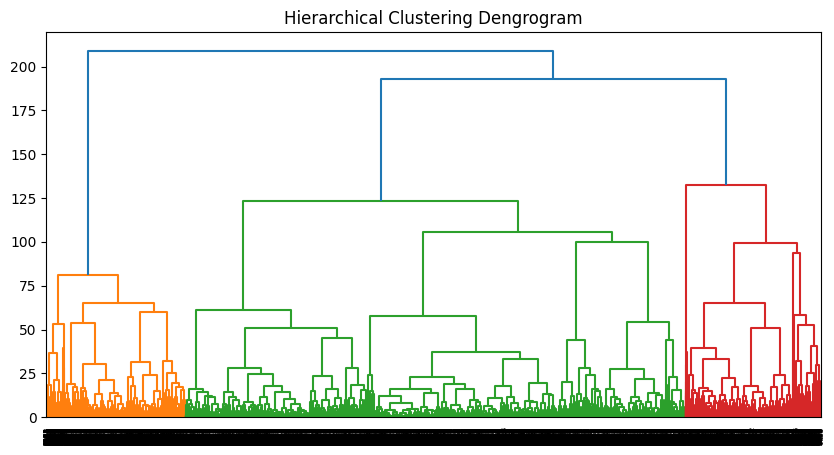

In [65]:
plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.title('Hierarchical Clustering Dengrogram')
plt.show()

In [66]:
from scipy.cluster.hierarchy import fcluster

result =[]
k = (2,3,4)

for i in k:
    cluster_lables= fcluster(Z, t=i,criterion='distance' )
    sil_score= silhouette_score(X,cluster_lables)
    
    result.append(sil_score)
    
print(result)

[0.15747569192116262, 0.13905420967495996, 0.12671068399181049]


Silhouette Score：

In [67]:
cluster_labels = fcluster(Z,t=2, criterion='distance')
hierarchy_sil_score =silhouette_score(X,cluster_labels)
hierarchy_sil_score

0.15747569192116262

The 3-cluster hierarchical clustering has the best silhouette score and it is 0.17520182891594666, which is not very good.

## Affinity Propagation Clustering

In [72]:
from sklearn.cluster import AffinityPropagation

X_np= X.to_numpy()

af = AffinityPropagation(random_state=0)
af_labels = af.fit_predict(X_np)

af_sil_score = silhouette_score(X_np, af_labels)
print(f'Affinity Propagation Silhoutte Score: {af_sil_score}')

##plt.scatter(X_np[:,0],X_np[:,1],c =af_labels)
##plt.show()

Affinity Propagation Silhoutte Score: 0.12856891231599954


In affinity propagation clustering, the silhouette score is low and the clustering is even worse.

## DBSCAN

DBSCAN Silhouette Score: -0.4714344971158231


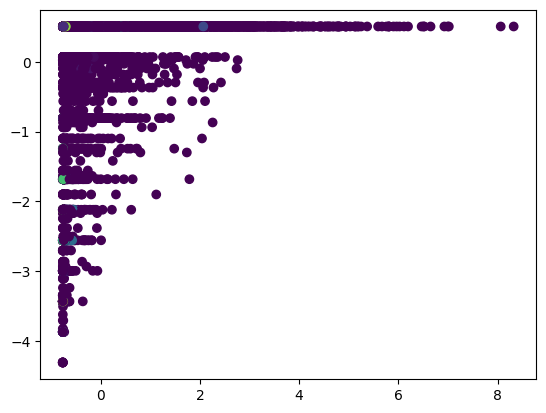

In [71]:
from sklearn.cluster import DBSCAN

X_np = X.to_numpy()

dbscan = DBSCAN(eps = 0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_np)

if len(set(dbscan_labels)) >1:
    dbscan_sil_score =silhouette_score(X_np,dbscan_labels)
    print(f'DBSCAN Silhouette Score: {dbscan_sil_score}')
    
plt.scatter(X_np[:,0],X_np[:,1],c=dbscan_labels)
plt.show()

In DBSCAN, the silhouette is negative, indicating the sample might have been sent to the wrong cluster. It is not good, either.

## Data Preprocessing

After importing the dataset, my first step was finding and dropping the rows with missing value to avoid potential bias to the clustering model. 

The customer id column was also removed because it does not provide any useful insight to the model.

Then I ran the correlation analysis to check whether some features have high correlation and then removed some of the features.

I then used scaling because most of the features are not balanced (right-skewed). 

In the end, I tried to conduct PCA to reduce the dimension of features, however it will make me harder to interpret the features in the end. Finally I decied to remove the PCA steps.



## EDA

I made comments at the end of EDA and I'll simply copy and paste them here. 

Most of the features are having a right-skewed trend, which means most of the customers tend to make few purchases and are not spending much money on the platform.

For example, balance, purchases, payments are many other feature are very RIGHT-SKEWED, marking the trend of spending very few and limited number of purchases of most customers and transactions. However, some features, such as purchase_frequency, are not right-skewed. 

Purchase frequency is a little bit symmetric, which means there are around equal amount of customers tend to make very few purchase and make many purchases. The credit limit is not VERY right-skewed, which means most customers have a low-to-medium amount of credit available. 

Overall, most customers tend to have few and small transactions (purchases) activities. 

Most of the customers have a tenure of 12 and a lot of customers has a high purchase frequency, which means that there are still plenty of customers that are ACTIVE and have a trend to purchase regularly.

## Clustering Algorithms

The Silhouette score for each clustering methods:

    **K-means: 0.2865558517317671

    Hierarchy clustering: 0.15747569192116262

    Affinity Propagation: 0.12856891231599954

    DBSCAN: -0.4714344971158231**

Based on the silhoutte scores we had, K-means clustering method has a relatively higher score and therefore the best performance among them all, which indicated that the samples are closer to their cluster and separated from other cluster. 

Hierarchy clustering and affinity propagation clustering performs well, but the silhouette score is not as good as K-means method. DBSCAN is relatively bad as this point with a negative silhouette score.

## Interpreting Clusters

**Cluster 0**:

Customers in cluster 0 have high purchses, installment_purchases and minimum_payment, they also have relatively high purchase_trx and payments. This result indicates that customers in cluster 1 tend to spend a lot in purchase, especially in installment. They also spend a lot on expensive stuff, which made the minimum_payment a lot more higher. They tend to purchase a lot of inexpensive items. 

**Cluster 1**:

Customers in cluster 1 have even higher minimum_payments and relatively higher credit_limit and payments, indicating that they might be rich customers who spend a lot in total every year. However, cluster 1 has low tenure and balance_frequency, which means they don't usually use credit card for purchase. 

**Cluster 2**:

Customers in cluster 2 have very high cash_advance, cash_advance_trx, payments and minimum_payments, this means they tend to pay back the credit card very early and don't want to owe money to the bank. Also they tend to spend a lot of moeny both in total every year and in each bill. This cluster also has the highest balance in these three, indicating customers in this cluster are relatively richer and have a better habit in paying back credit card. 

**Features to distinguish**:

Cluster 0 customers tend to buy more stuff but the prices are usually lower, indicating they might not be very rich. [PURCHASES]

Cluster 1 customers tend to spend a lot of moeny in purchases but they don't use credit card very often, indicating they might be old people or people who have preference in other payment methods, who only use credit card when emergencies. [MINIMUM_PAYMENTS, TENURE, BALANCE_Frequency]

Cluster 2 customers tend to pay back credit card in advance and also spend a lot using credit card, indicating they might be rich people with good credit card usage habit. [CASH_ADVANCE, MINIMUM_PAYMENTS]

## Actionable Insights:

**Cluster 0**: Use more, Spend less

People in cluster 0 tend to use card a lot but the total amount they spend is little. 

**Banks can stimulate their large purchases by setting up rewards that they can earn if they spend a sufficient amount every month.**

**Cluster 1**: Spend a lot, use less, low balance

People in cluster 1 tend to spend a lot of money but they don't often use credit card.

**Banks can incentivize them to use their cards more by setting goals and rewards for the number of times they use their cards each month, cultivating habits.**

**Cluster 2**: Pay back early, spend a lot

**Banks can offer them lower interest rates to encourage them to abandon the habit of paying off credit cards early, thereby increasing the bank's potential future earnings.**